<a href="https://colab.research.google.com/github/RaulLozanoPonce/PCPeripheral/blob/master/PC_Peripheral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PC-PERIPHERAL**

Se trata de una red convolutiva que distingue y clasifica 10 tipos diferentes de periféricos. Los 10 tipos a distinguir son:

1.   Altavoces
2.   Auriculares
3.   Impresora
4.   Mando
5.   Micrófono
6.   Pantalla
7.   Ratón
8.   Teclado
9.   Torre
10.   Web Cam

Cabe destacar que el dataset no ha sido descargado de ninguna página; ha sido creado por mi foto a foto. Es por ello que tan solo se disponen de unas 100 muestras aproximadamente por cada periférico.

La mayoría de las fotos se han obtenido del buscador de imágenes de Google. Esta es la razón por la cual la mayoría de las fotos muestran un característico fondo banco, ya que la mayoría son procedentes de páginas de compra online de periféricos. No obstante, se ha priorizado incluir fotos más cotidianas, e incluso algunas fueron obtenidas de primera mano, o bien gracias a terceros.

El dataset se encuentra disponible en una carpeta de mi drive personal, a la cual hago referencia a continuación:
https://drive.google.com/drive/folders/1rp_-tf4BIayfe7KG0gmKBrxtA-4AWtOK?usp=sharing

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Comprobación del correcto funcionamiento del DataSet

Altavoces    Impresora	Micro	  Raton    Torre
Auriculares  Mando	Pantalla  Teclado  WebCam


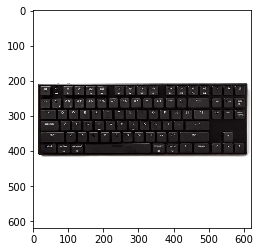

In [39]:
!ls "/content/drive/My Drive/PCDataset"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/PCDataset/Teclado/tec4.jpg', 'r')
imshow(np.asarray(pil_im))

### Código de la red convolutiva

In [41]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/PCDataset'
validation_data_dir = '/content/drive/My Drive/PCDataset'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 15

history = model.fit_generator(
        train_generator,
        steps_per_epoch=200,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=50,
)

Found 1023 images belonging to 10 classes.
Found 1023 images belonging to 10 classes.
Epoch 1/15
200/200 [==============================] - 74s 370ms/step - loss: 1.9457 - acc: 0.3039 - val_loss: 1.2883 - val_acc: 0.5672
Epoch 2/15
200/200 [==============================] - 74s 369ms/step - loss: 1.1547 - acc: 0.6211 - val_loss: 0.5935 - val_acc: 0.8091
Epoch 3/15
200/200 [==============================] - 77s 387ms/step - loss: 0.7141 - acc: 0.7639 - val_loss: 0.5256 - val_acc: 0.8318
Epoch 4/15
200/200 [==============================] - 76s 380ms/step - loss: 0.4720 - acc: 0.8453 - val_loss: 0.1105 - val_acc: 0.9712
Epoch 5/15
200/200 [==============================] - 74s 369ms/step - loss: 0.3258 - acc: 0.8895 - val_loss: 0.0812 - val_acc: 0.9744
Epoch 6/15
200/200 [==============================] - 74s 369ms/step - loss: 0.2420 - acc: 0.9195 - val_loss: 0.0852 - val_acc: 0.9681
Epoch 7/15
200/200 [==============================] - 74s 372ms/step - loss: 0.2048 - acc: 0.9317 - val_

### Gráficas de de precisión y pérdidas

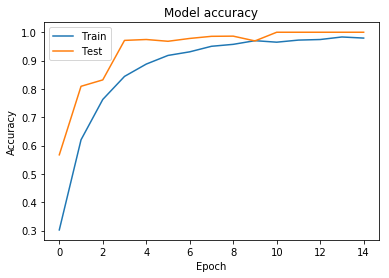

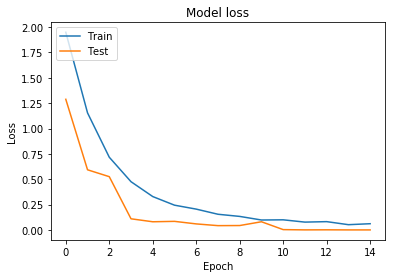

In [43]:
import matplotlib.pyplot as plt

model.save('/content/drive/My Drive/Colab Notebooks/pcperipheral.h5')

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Validación manual

In [44]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = '/content/drive/My Drive/PCDataset/Teclado/tec4.jpg'
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
label_map = (train_generator.class_indices)

for i in range (0, len(features[0])):
  if features[0][i] > 0.5:
    j = 0
    for key in label_map:
      if i == j:
        print("La imagen a validar se trata de: ", key)
      j += 1

La imagen a validar se trata de:  Teclado
